In [1]:
import numpy as np
import pygimli as pg
from pygimli.physics import ert
import pygimli.meshtools as mt
import seaborn as sns
import pandas as pd

In [2]:
data = ert.load('Surveys/full_data/nov_25_1_IP_trim.dat')

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x7f1a1b9cc8e0>)

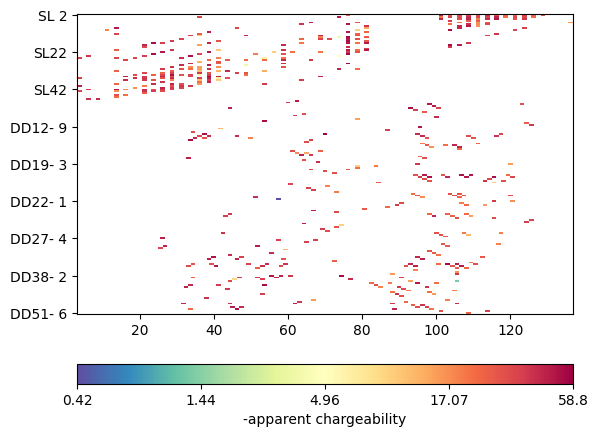

In [3]:
data.show("ip", label="-apparent chargeability")

In [4]:
data["k"] = ert.geometricFactors(data)

In [5]:
data.estimateError()

<Axes: ylabel='Count'>

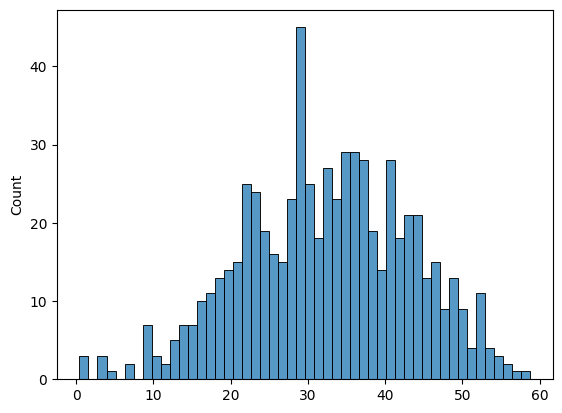

In [7]:
sns.histplot(data["ip"], bins=50)

In [9]:
mgr2 = ert.ERTIPManager(data)

In [10]:
inv2 = mgr2.invert(secNodes=1, paraMaxCellSize=10.0, 
                    zWeight=0.2, verbose=1)

21/02/24 - 22:10:34 - pyGIMLi - INFO - Found 2 regions.
21/02/24 - 22:10:34 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/02/24 - 22:10:34 - pyGIMLi - INFO - Found 2 regions.
21/02/24 - 22:10:34 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/02/24 - 22:10:34 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/02/24 - 22:10:34 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Constructing Delaunay triangulation by divide-and-conquer method.
Delaunay milliseconds:  0
Recovering segments in Delaunay triangulation.
Segment milliseconds:  0
Removing unwanted triangles.
Spreading regional attributes and area constraints.
Hole milliseconds:  0
Adding Steiner points to enforce quality.
Quality milliseconds:  2

Writing vertices.
Writing triangles.
Writing segments.
Writing edges.

Output milliseconds:  0
Total running milliseconds:  4

Statistics:

  Input vertices: 135
  Input segments: 136
  Input holes: 0

  Mesh vertices: 1795
  Mesh triangles: 3413
  Mesh edges: 5207
  Mesh exterior boundary edges: 175
  Mesh interior boundary edges: 76
  Mesh subsegments (constrained edges): 251



21/02/24 - 22:10:34 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7002 Cells: 13652 Boundaries: 10414
21/02/24 - 22:10:34 - pyGIMLi - INFO - Use median(data values)=40.5
21/02/24 - 22:10:34 - pyGIMLi - INFO - Created startmodel from forward operator: 2653 [40.5,...,40.5]
21/02/24 - 22:10:34 - pyGIMLi - INFO - Starting inversion.


min/max(dweight) = 33.1559/33.3329
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x7f1a196bebb0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x7f1a1bae5ad0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x7f1a353674c0>
min/max (data): 6.23/2490
min/max (error): 3%/3.02%
min/max (start model): 40.5/40.5
--------------------------------------------------------------------------------
use model trans from RegionManager
Calculating response for model: min = 40.5 max = 40.5
Allocating memory for primary potential...... 0.0354326

No primary potential for secondary field calculation with topography.
Creating P2-Primmesh:		Nodes: 27655	Cells: 13652	Boundaries: 20653
ModellingBase::setMesh() copying new mesh ... Found topography for surface=1463.38 : 1463.24
Found datafile: 64 electrodes
Found: 64 node-electrodes
rMin = 1.25854, rMax = 320.05
NGauLeg + NGauLag for inverse Fouriertransformation: 14 + 4
Found non-Neumann domain
0.

21/02/24 - 22:18:29 - pyGIMLi - INFO - Found 1 regions.
21/02/24 - 22:18:29 - Core - INFO - Create H2 refined mesh for forward tasks.
21/02/24 - 22:18:29 - pyGIMLi - INFO - Starting inversion.


800.439%
tau = 0. Trying parabolic line search with step length 0.3Calculating response for model: min = 0.373504 max = 93013.2
Using existing primary potentials.
Forward: time: 8.67982s
Response: min = 4.27231 max = 916.173 mean = 116.374
Reciprocity rms(modelReciprocity) 14.419%, max: 45.4624%
chi² = 98.47 (dPhi = 0.18%) lam: 20.0
################################################################################
#                 Abort criteria reached: dPhi = 0.18 (< 2.0%)                 #
################################################################################
 ==> tau = 0.0912679
16: LS newModel: min = 0.229868; max = 263010
16: LS newResponse: min = 6.04949; max = 1674.87
16: rms/rrms(data, LS newResponse) = 213.182/427.242%
16: chi^2(data, LS newResponse, error, log) = 231.796
16: Phi = 151826+247.69*20=156780
Linesearch tau = 0.0912679
Calculating response for model: min = 0.431676 max = 91289.4
Using existing primary potentials.
Forward: time: 6.85583s
Response: min = 5

(1450.0, 1490.006104)

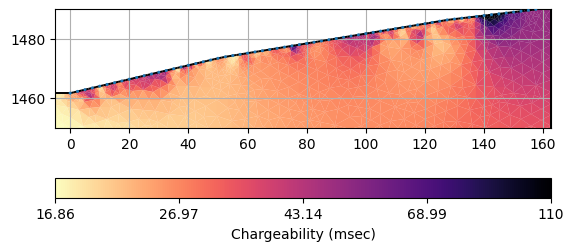

In [19]:
ax, cb = mgr2.showIPModel(label="Chargeability (msec)", coverage=mgr2.standardizedCoverage(-5))
ax.grid(True)
ax.set_ylim([1450, ax.get_ylim()[1]])